<a href="https://colab.research.google.com/github/lgeralas/Examen1/blob/main/lastmile_delivery_operations_mit_lift_lab_serving_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importar librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
 #cargar archivo csv desde equipo 
from google.colab import files 
files.upload()

In [22]:
#Carga desde un archivo .csv sin indice
lastmile_serving = pd.read_csv('lastmile_delivery_operations_mit_lift_lab_serving_customer.csv')

In [23]:
#Verificamos info del Data Frame
lastmile_serving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   _child_record_id                        35 non-null     object 
 1   _record_id                              35 non-null     object 
 2   _parent_id                              35 non-null     object 
 3   _title                                  35 non-null     object 
 4   _version                                35 non-null     int64  
 5   _created_at                             35 non-null     object 
 6   _updated_at                             35 non-null     object 
 7   _created_by                             35 non-null     object 
 8   _updated_by                             35 non-null     object 
 9   _index                                  35 non-null     int64  
 10  _geometry                               35 non-null     object 


In [24]:
#Identificar valores nulos por columna
valores_nulos=lastmile_serving.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered             10
picture_ca

In [26]:
#Sustituir valores nulos por un string en concreto de picture_cargo_being_delivered, aqui se pondrá que no se proporciono la fotografía solicitada
lastmile_serving['picture_cargo_being_delivered']=lastmile_serving['picture_cargo_being_delivered'].fillna('No se proporciono fotografía')

#Sustituir valores nulos por un string en concreto de picture_cargo_being_delivered_captions, aqui se pondrá que la información no se presenta 
lastmile_serving['picture_cargo_being_delivered_captions']=lastmile_serving['picture_cargo_being_delivered_captions'].fillna('Sin información presente')

#Sustituir valores nulos por un string en concreto de para picture_cargo_being_delivered_urls, aqui se indicará que no se presenta el URL de la fotografía
lastmile_serving['picture_cargo_being_delivered_urls']=lastmile_serving['picture_cargo_being_delivered_urls'].fillna('No se presenra URL')

#Se llenan estos datos con frases como 'no se presenta información', esto ya que las fotografías aportan evidencia de calidad e impotante para la recavación de datos

<Figure size 1080x576 with 0 Axes>

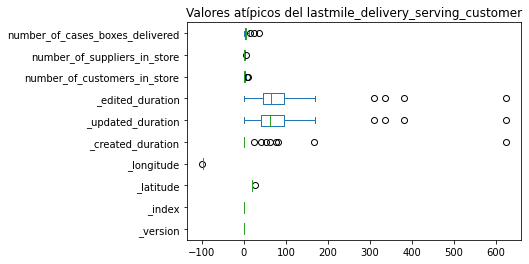

In [27]:
#Realizamos diagrama de caja o bigote de cada columna del data frame
fig=plt.figure(figsize=(15,8))
lastmile_serving.plot(kind='box',vert=False)
plt.title('Valores atípicos del lastmile_delivery_serving_customer')
plt.show () #dibujamos el diagrama

In [40]:
#Método aplicando desviación estandar. Encuentra los valores extremos 
y=lastmile_serving
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print('Limite superior permitido', Limite_Superior)
print('Limite inferior permitido', Limite_Inferior)

Limite superior permitido _version                             1.000000
_index                               0.000000
_latitude                           22.553018
_longitude                         -97.280436
_created_duration                  358.403131
_updated_duration                  485.826981
_edited_duration                   483.899300
number_of_customers_in_store         7.828641
number_of_suppliers_in_store         4.146352
number_of_cases_boxes_delivered     26.908299
dtype: float64
Limite inferior permitido _version                             1.000000
_index                               0.000000
_latitude                           15.874103
_longitude                         -99.338593
_created_duration                 -294.003131
_updated_duration                 -284.226981
_edited_duration                  -275.042157
number_of_customers_in_store        -4.514356
number_of_suppliers_in_store        -1.174923
number_of_cases_boxes_delivered    -14.851156
dtype: float6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [41]:
#Encontramos outliers del Dataframe
outliers= lastmile_serving[(y>Limite_Superior)|(y<Limite_Inferior)]

#Obtenemos datos limpiosy los outliers se convertiran en nulos en el Dataframe
data3=lastmile_serving[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


,_child_record_id,_record_id,_parent_id,_title,_version,_created_at,_updated_at,_created_by,_updated_by,_index,...,name_of_the_store,entering_the_store,number_of_customers_in_store,number_of_suppliers_in_store,picture_cargo_being_delivered,picture_cargo_being_delivered_captions,picture_cargo_being_delivered_urls,number_of_cases_boxes_delivered,trolley_in_use,leaving_the_store
0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,NaN,NaN
1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,12.0,NaN,NaN
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,7.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN
6,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN
7,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN
8,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN
9,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,11.0,NaN,NaN


In [42]:
#eliminamos columnas innecesarias que marcan los valores nulos en el programa 
data3= data3.drop(['_child_record_id','_record_id','_parent_id', '_title', '_version', '_created_at', '_updated_at', '_updated_by', '_created_by', '_index','_geometry', '_latitude', '_longitude', '_changeset_id', 'name_of_the_store', 'entering_the_store','picture_cargo_being_delivered','picture_cargo_being_delivered_urls', 'picture_cargo_being_delivered_captions', 'trolley_in_use', 'leaving_the_store'], axis=1)
data3

,_created_duration,_updated_duration,_edited_duration,number_of_customers_in_store,number_of_suppliers_in_store,number_of_cases_boxes_delivered
0,61.0,3.0,64.0,1.0,1.0,15.0
1,80.0,80.0,80.0,0.0,2.0,NaN
2,25.0,61.0,86.0,0.0,1.0,12.0
3,41.0,7.0,48.0,0.0,1.0,3.0
4,76.0,76.0,76.0,0.0,1.0,1.0
5,53.0,53.0,53.0,7.0,1.0,3.0
6,0.0,8.0,8.0,1.0,1.0,3.0
7,0.0,4.0,4.0,2.0,1.0,3.0
8,0.0,116.0,116.0,2.0,1.0,2.0
9,NaN,NaN,NaN,3.0,2.0,11.0


In [43]:
#Reemplazar valores átipicos (nulos) dE la base de datos con mean() para así evitar que halla valores nulos que se hallan eliminado con el método de desviación estandar
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))

In [44]:
#Unimos las columnas de los strings que fueron eliminados, estas columnas serán las que ya no contienen datos nulos
strings=lastmile_serving[['_child_record_id','_record_id','_parent_id', '_title', '_version', '_created_at', '_updated_at', '_updated_by', '_created_by', '_index','_geometry', '_latitude', '_longitude', '_changeset_id', 'name_of_the_store', 'entering_the_store','picture_cargo_being_delivered','picture_cargo_being_delivered_urls', 'picture_cargo_being_delivered_captions', 'trolley_in_use', 'leaving_the_store']]
Datos_limpios=pd.concat([strings, data_clean], axis=1)
Datos_limpios

,_child_record_id,_record_id,_parent_id,_title,_version,_created_at,_updated_at,_updated_by,_created_by,_index,...,picture_cargo_being_delivered_urls,picture_cargo_being_delivered_captions,trolley_in_use,leaving_the_store,_created_duration,_updated_duration,_edited_duration,number_of_customers_in_store,number_of_suppliers_in_store,number_of_cases_boxes_delivered
0,12645bc3-33b6-4cc0-9c8e-9d8e6f35aa01,04e64464-3fbd-4ce1-99d8-5364e1567e8c,04e64464-3fbd-4ce1-99d8-5364e1567e8c,La fete,1,2022-11-12 18:00:54 UTC,2022-11-12 18:02:03 UTC,Juan Carlos Bejarano Moreno,Juan Carlos Bejarano Moreno,0,...,https://web.fulcrumapp.com/api/v2/file?context...,",",no,12:12,61.0,3.0,64.0,1.0,1.0,15.0
1,be0fc402-769c-41f8-90f1-1b0c9f151e7a,cda7b134-7827-4830-9337-53f46be4f8b4,cda7b134-7827-4830-9337-53f46be4f8b4,Casa Flores,1,2022-11-12 16:54:27 UTC,2022-11-12 16:55:48 UTC,Juan Carlos Bejarano Moreno,Juan Carlos Bejarano Moreno,0,...,https://web.fulcrumapp.com/api/v2/file?context...,",",no,11:00,80.0,80.0,80.0,0.0,2.0,5.2
2,634bbd94-8159-4733-973a-36ab89fb95d4,cbaab095-ad31-4145-804b-ddc218681802,cbaab095-ad31-4145-804b-ddc218681802,Super deux,1,2022-11-12 16:43:26 UTC,2022-11-12 16:45:00 UTC,Juan Carlos Bejarano Moreno,Juan Carlos Bejarano Moreno,0,...,https://web.fulcrumapp.com/api/v2/file?context...,Sin información presente,no,10:50,25.0,61.0,86.0,0.0,1.0,12.0
3,cf8e05ea-0af9-4a66-9d8b-27c0cf572236,68b5ecad-36b0-4172-b2b3-43aebd0485ec,68b5ecad-36b0-4172-b2b3-43aebd0485ec,Dansk,1,2022-11-12 16:37:55 UTC,2022-11-12 16:38:54 UTC,Juan Carlos Bejarano Moreno,Juan Carlos Bejarano Moreno,0,...,https://web.fulcrumapp.com/api/v2/file?context...,Sin información presente,no,10:43,41.0,7.0,48.0,0.0,1.0,3.0
4,a1ff05ef-fe15-472e-ad6d-537c951afce4,3b19bb47-17f0-4d33-aa27-cf6890bacfe5,3b19bb47-17f0-4d33-aa27-cf6890bacfe5,Ink Factory,1,2022-11-12 16:19:57 UTC,2022-11-12 16:21:14 UTC,Juan Carlos Bejarano Moreno,Juan Carlos Bejarano Moreno,0,...,https://web.fulcrumapp.com/api/v2/file?context...,Sin información presente,yes,10:33,76.0,76.0,76.0,0.0,1.0,1.0
5,9e96f584-f5b2-4e7d-a754-a34fc89d5139,2b8a179a-521c-4ee3-a5ef-241fd1972b01,2b8a179a-521c-4ee3-a5ef-241fd1972b01,Breaking Bread Coffee,1,2022-11-12 15:59:13 UTC,2022-11-12 16:00:07 UTC,Juan Carlos Bejarano Moreno,Juan Carlos Bejarano Moreno,0,...,https://web.fulcrumapp.com/api/v2/file?context...,Sin información presente,no,10:06,53.0,53.0,53.0,7.0,1.0,3.0
6,531eb119-cab7-4ba9-8a25-489e91ec2a5a,3aa26fc8-4373-4387-ac50-4f7b0d417107,3aa26fc8-4373-4387-ac50-4f7b0d417107,Abarrotes vinos y licores La ranita,1,2022-11-10 18:31:16 UTC,2022-11-11 01:23:59 UTC,Sandra Carreón,Sandra Carreón,0,...,No se presenra URL,Sin información presente,no,12:33,0.0,8.0,8.0,1.0,1.0,3.0
7,17995e32-9ed3-4a27-8da3-b4e1d942ad36,5288fd44-2899-4765-9195-3f866d2e6d45,5288fd44-2899-4765-9195-3f866d2e6d45,Abarrotes vinos y licores La ranita,1,2022-11-11 04:30:19 UTC,2022-11-11 05:27:33 UTC,Sandra Carreón,Sandra Carreón,0,...,No se presenra URL,Sin información presente,no,13:01,0.0,4.0,4.0,2.0,1.0,3.0
8,009bf340-321a-4739-84b4-d80029770d10,d1662ccd-4787-4c38-969a-a9e8a01ad1c2,d1662ccd-4787-4c38-969a-a9e8a01ad1c2,Mony,1,2022-11-11 22:44:44 UTC,2022-11-11 22:46:40 UTC,Sandra Carreón,Sandra Carreón,0,...,No se presenra URL,Sin información presente,no,16:28,0.0,116.0,116.0,2.0,1.0,2.0
9,c78336c3-d0ab-4e08-bc2e-f15af41f76fb,6f431744-a51b-4b36-b33f-13fb860ef131,6f431744-a51b-4b36-b33f-13fb860ef131,Tomales y molino Anita,1,2022-11-04 21:57:43 UTC,2022-11-04 22:11:37 UTC,José Varela,José Varela,0,...,https://web.fulcrumapp.com/api/v2/file?context...,Sin información presente,yes,16:19,14.8,85.4,89.1,3.0,2.0,11.0


In [46]:
#Identificar valores nulos por columna
valores_nulos=lastmile_serving.isnull().sum()
valores_nulos

_child_record_id                          0
_record_id                                0
_parent_id                                0
_title                                    0
_version                                  0
_created_at                               0
_updated_at                               0
_created_by                               0
_updated_by                               0
_index                                    0
_geometry                                 0
_latitude                                 0
_longitude                                0
_changeset_id                             0
_created_duration                         0
_updated_duration                         0
_edited_duration                          0
name_of_the_store                         0
entering_the_store                        0
number_of_customers_in_store              0
number_of_suppliers_in_store              0
picture_cargo_being_delivered             0
picture_cargo_being_delivered_ca

In [47]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv('Datos_limpios_lastmile_serving_mit.csv')

#descargar archivo filtrado en csv
from google.colab import files

files.download('Datos_limpios_lastmile_serving_mit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>